# 여자배구 데이터 분석, 경기 결과 예측 프로젝트

## 라이브러리 import

In [1]:
pip install findspark

Note: you may need to restart the kernel to use updated packages.


In [1]:
import findspark as fs

fs.init()

In [2]:
# spark 생성

import pyspark
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

## 데이터 전처리 pt.2

In [34]:
# 파일 불러오기
player = spark.read.csv("hdfs://localhost:9000/data/player_rate.csv", header="true", inferSchema="true")
player.show()

+------+------------+---+------+-----+--------+--------+-------+---+----+---+-------+----+
|  name|        team|pos| score|error|setcount|at_srate|at_rate| sv| set| bl|rs_rate|  dg|
+------+------------+---+------+-----+--------+--------+-------+---+----+---+-------+----+
|임명옥|한국도로공사| Li|1475.0|    3|     117|     0.0|    0.0|0.0|1.05|0.0|  55.24| 5.9|
|신연경| IBK기업은행| Li|1158.6|    3|     112|     0.0|    0.0|0.0| 0.6|0.0|  39.43|5.28|
|김연견|    현대건설| Li|1099.0|    4|     113|     0.0|    0.0|0.0|0.79|0.0|   39.2|4.96|
|오지영|    GS칼텍스| Li| 880.6|    2|      94|     0.0|    0.0|0.0|0.51|0.0|  39.37|3.99|
|문슬기|페퍼저축은행| Li| 841.8|    2|      99|     0.0|    0.0|0.0| 0.7|0.0|  32.04| 3.1|
|  노란| KGC인삼공사| Li| 819.8|    5|      83|     0.0|    0.0|0.0|0.65|0.0|  40.62|5.01|
|김해란|    흥국생명| Li| 596.4|    2|      58|     0.0|    0.0|0.0|1.02|0.0|  31.28|5.78|
|도수빈|    흥국생명| Li| 589.2|    3|      60|     0.0|    0.0|0.0|0.63|0.0|  38.38| 4.9|
|김세인|페퍼저축은행| Li| 334.4|    0|      84|     0.0|    0.0|0.

In [22]:
# 불러온 데이터 테이블로 만들기
data.createOrReplaceTempView("player")

In [23]:
player = spark.sql("""
          select name,team,pos,at_srate,at_rate,sv,set,bl,rs_rate,dg
          from player
          """)

player.createOrReplaceTempView("player")

player.show()

+------+------------+---+--------+-------+---+----+---+-------+----+
|  name|        team|pos|at_srate|at_rate| sv| set| bl|rs_rate|  dg|
+------+------------+---+--------+-------+---+----+---+-------+----+
|임명옥|한국도로공사| Li|     0.0|    0.0|0.0|1.05|0.0|  55.24| 5.9|
|신연경| IBK기업은행| Li|     0.0|    0.0|0.0| 0.6|0.0|  39.43|5.28|
|김연견|    현대건설| Li|     0.0|    0.0|0.0|0.79|0.0|   39.2|4.96|
|오지영|    GS칼텍스| Li|     0.0|    0.0|0.0|0.51|0.0|  39.37|3.99|
|문슬기|페퍼저축은행| Li|     0.0|    0.0|0.0| 0.7|0.0|  32.04| 3.1|
|  노란| KGC인삼공사| Li|     0.0|    0.0|0.0|0.65|0.0|  40.62|5.01|
|김해란|    흥국생명| Li|     0.0|    0.0|0.0|1.02|0.0|  31.28|5.78|
|도수빈|    흥국생명| Li|     0.0|    0.0|0.0|0.63|0.0|  38.38| 4.9|
|김세인|페퍼저축은행| Li|     0.0|    0.0|0.0|0.23|0.0|  30.56| 2.2|
|채선아| KGC인삼공사| Li|     0.0|    0.0|0.0|0.68|0.0|  39.34|3.78|
|한수진|    GS칼텍스| Li|     0.0|    0.0|0.0|0.25|0.0|    0.0|2.25|
|한다혜|    GS칼텍스| Li|     0.0|    0.0|0.0|0.27|0.0|  51.79| 1.6|
|김수빈| IBK기업은행| Li|     0.0|    0.0|0.0|0.08|0.0|  2

In [20]:
player = spark.sql("""
          SELECT * FROM player WHERE name!='하혜진'
          """)

player.createOrReplaceTempView("player")

spark.sql("SELECT * FROM player WHERE pos='R'").show()

+--------+------------+---+--------+-------+----+----+----+-------+----+
|    name|        team|pos|at_srate|at_rate|  sv| set|  bl|rs_rate|  dg|
+--------+------------+---+--------+-------+----+----+----+-------+----+
|    캣벨|    흥국생명|  R|    36.6|  29.45|0.16|0.08|0.42|    0.0|3.16|
|    켈시|한국도로공사|  R|   42.19|  36.94|0.12|0.01| 0.6|    0.0|2.51|
|    모마|    GS칼텍스|  R|   47.58|  41.27| 0.4|0.11|0.36|  33.33|2.38|
|  옐레나| KGC인삼공사|  R|   39.67|  34.75|0.16| 0.1|0.59|  14.29|3.19|
|  야스민|    현대건설|  R|   42.86|  35.34|0.44|0.09|0.43|  100.0|2.05|
|엘리자벳|페퍼저축은행|  R|   41.45|  32.89|0.17|0.03|0.49| -33.33|2.01|
|  문정원|한국도로공사|  R|   29.69|  24.89|0.14| 0.3|0.06|  38.73|2.38|
|    라셈| IBK기업은행|  R|   34.82|  27.47|0.17|0.06|0.23|    0.0|1.87|
|  김다은|    흥국생명|  R|   33.02|  24.19|0.14|0.22| 0.3|  18.69|2.19|
|  황연주|    현대건설|  R|   38.82|  35.29|0.07|0.04|0.11|    0.0|0.79|
|  이은지|페퍼저축은행|  R|     0.0|    0.0|0.01| 0.0| 0.0|   50.0| 0.2|
|  문지윤|    GS칼텍스|  R|    48.0|   40.0| 0.0| 0.0|0.13|    0.

In [25]:
ha = spark.sql("""
          SELECT name,team,'C' as pos,at_srate,at_rate,sv,set,bl,rs_rate,dg
          FROM player
          WHERE name='하혜진'
          UNION
          SELECT * FROM player WHERE name!='하혜진'
          """)
ha.show()

ha.createOrReplaceTempView("ha")

+------+------------+---+--------+-------+----+----+----+-------+----+
|  name|        team|pos|at_srate|at_rate|  sv| set|  bl|rs_rate|  dg|
+------+------------+---+--------+-------+----+----+----+-------+----+
|한송이| KGC인삼공사|  C|   39.89|  35.11|0.08|0.23|0.53|  21.05|1.31|
|이예담|한국도로공사|  C|     0.0|    0.0| 0.0| 0.0| 0.0|    0.0| 0.0|
|이나연|    현대건설|  S|     0.0|    0.0|0.02|3.81| 0.0|    0.0|0.81|
|차유정|    GS칼텍스| Li|     0.0|    0.0| 0.0| 0.0| 0.0|    0.0| 0.0|
|  이진| IBK기업은행|  S|     0.0| -14.29| 0.0|3.09|0.06|    0.0|0.69|
|양효진|    현대건설|  C|   52.48|  47.92|0.21|0.24|0.74|  40.54|1.44|
|조송화| IBK기업은행|  S|   15.38|   7.69|0.09|6.73|0.09|    0.0|2.68|
|이현지|    현대건설|  L|     0.0|    0.0|0.17| 0.0| 0.0|   25.0|0.08|
|한송희|한국도로공사|  L|     0.0|    0.0| 0.0| 0.0| 0.0|    0.0| 0.0|
|  이현|페퍼저축은행|  S|   21.62|  16.22|0.13|8.37|0.04|    0.0|2.11|
|하혜진|페퍼저축은행|  C|   33.89|  27.52|0.15|0.09|0.39|   10.0|1.14|
|육서영| IBK기업은행|  L|    30.0|  18.24|0.03|0.05| 0.0|  16.36|1.18|
|채선아| KGC인삼공사|  L|     0

In [32]:
spark.sql("SELECT * FROM ha WHERE pos='C'").show(5)

+------+------------+---+--------+-------+----+----+----+-------+----+
|  name|        team|pos|at_srate|at_rate|  sv| set|  bl|rs_rate|  dg|
+------+------------+---+--------+-------+----+----+----+-------+----+
|한송이| KGC인삼공사|  C|   39.89|  35.11|0.08|0.23|0.53|  21.05|1.31|
|이예담|한국도로공사|  C|     0.0|    0.0| 0.0| 0.0| 0.0|    0.0| 0.0|
|양효진|    현대건설|  C|   52.48|  47.92|0.21|0.24|0.74|  40.54|1.44|
|하혜진|페퍼저축은행|  C|   33.89|  27.52|0.15|0.09|0.39|   10.0|1.14|
|정시영|    현대건설|  C|    50.0|    0.0| 0.0|0.11| 0.0|    0.0|0.22|
+------+------------+---+--------+-------+----+----+----+-------+----+
only showing top 5 rows



In [31]:
ha = spark.sql("""
          SELECT * FROM ha
          ORDER BY pos
          """)
ha.show()

ha.createOrReplaceTempView("player")

+------+------------+---+--------+-------+----+----+----+-------+----+
|  name|        team|pos|at_srate|at_rate|  sv| set|  bl|rs_rate|  dg|
+------+------------+---+--------+-------+----+----+----+-------+----+
|오세연|    GS칼텍스|  C|   100.0|  100.0| 0.0| 0.0| 0.0|    0.0| 0.0|
|김현정| IBK기업은행|  C|   28.57|  17.14|0.04|0.07|0.11|  -25.0|0.52|
|이다현|    현대건설|  C|   46.88|  40.63|0.09|0.15|0.74|  37.04|1.05|
|이주아|    흥국생명|  C|   36.29|   27.7|0.22|0.18|0.72|  30.56| 1.0|
|박은진| KGC인삼공사|  C|   42.24|  38.36|0.11|0.16|0.44|  13.33|0.81|
|정호영| KGC인삼공사|  C|   48.37|  42.93|0.11|0.08|0.53|  11.11|0.88|
|양효진|    현대건설|  C|   52.48|  47.92|0.21|0.24|0.74|  40.54|1.44|
|최정민| IBK기업은행|  C|    34.4|  27.98|0.13|0.08|0.29|    0.0|0.89|
|하유정|한국도로공사|  C|   45.45|  36.36| 0.0| 0.0| 0.0|    0.0| 0.4|
|김유리|    GS칼텍스|  C|   40.82|  37.76|0.11|0.06|0.15|    0.0|0.58|
|김채연|    흥국생명|  C|   34.24|  27.24| 0.1|0.13| 0.4|   35.0|1.15|
|하혜진|페퍼저축은행|  C|   33.89|  27.52|0.15|0.09|0.39|   10.0|1.14|
|이예담|한국도로공사|  C|     

In [33]:
ha.count()

141

In [43]:
player = ha

In [4]:
# 파일 불러오기
game = spark.read.csv("hdfs://localhost:9000/data/game.csv", header="true", inferSchema="true")
game.show()

+---+-----------+------------+------------+-----+-----+------------+
|_c0|       date|       teamH|       teamA|score|round|         win|
+---+-----------+------------+------------+-----+-----+------------+
|  1|10. 16 (토)|    GS칼텍스|    흥국생명|  3:0|    1|    GS칼텍스|
|  2|10. 17 (일)|    현대건설| IBK기업은행|  3:1|    1|    현대건설|
|  3|10. 19 (화)|페퍼저축은행| KGC인삼공사|  1:3|    1| KGC인삼공사|
|  4|10. 20 (수)|한국도로공사|    현대건설|  0:3|    1|    현대건설|
|  5|10. 21 (목)| IBK기업은행|    흥국생명|  1:3|    1|    흥국생명|
|  6|10. 22 (금)|페퍼저축은행|    GS칼텍스|  0:3|    1|    GS칼텍스|
|  7|10. 23 (토)| KGC인삼공사|한국도로공사|  3:0|    1| KGC인삼공사|
|  8|10. 24 (일)|    현대건설|    흥국생명|  3:1|    1|    현대건설|
|  9|10. 26 (화)| IBK기업은행|한국도로공사|  1:3|    1|한국도로공사|
| 10|10. 27 (수)|    GS칼텍스|    현대건설|  1:3|    1|    현대건설|
| 11|10. 28 (목)| KGC인삼공사|    흥국생명|  3:1|    1| KGC인삼공사|
| 12|10. 29 (금)|한국도로공사|페퍼저축은행|  3:0|    1|한국도로공사|
| 13|10. 30 (토)|    GS칼텍스| IBK기업은행|  3:1|    1|    GS칼텍스|
| 14|10. 31 (일)| KGC인삼공사|    현대건설|  0:3|    1|    현대건설|
| 15|11. 02 (화)|페퍼저축

In [5]:
gamedetail = spark.read.csv("hdfs://localhost:9000/data/gamedetail.csv", header="true", inferSchema="true")
gamedetail.show()

+---+-------+-------+------+------+------+------+------+------+-------+-------+-------+-------+------+------+-------+-------+
|_c0|atsuccH|atsuccA|atcntH|atcntA|blcntH|blcntA|svcntH|svcntA|errcntH|errcntA|digcntH|digcntA|rscntH|rscntA|setcntH|setcntA|
+---+-------+-------+------+------+------+------+------+------+-------+-------+-------+-------+------+------+-------+-------+
|  1|   43.0|   36.9| 17.33| 12.67|  1.67|  3.33|  1.67|   1.0|   5.67|    5.0|  21.33|   19.0| 12.33|  6.67|  16.67|  11.33|
|  2|   44.4|   33.3| 14.75|  11.0|   3.0|   1.0|  1.25|   0.5|   5.75|    5.5|   20.0|   15.5|   6.5|  8.25|   14.5|  10.25|
|  3|   32.6|   36.9| 11.25| 13.75|  1.75|   2.0|  1.75|   1.0|    6.0|    6.0|   19.0|  24.25|   8.0|  6.75|  10.25|  13.25|
|  4|   32.7|   44.2| 12.33| 16.67|   2.0|  2.33|  0.33|  1.33|   4.67|   3.67|   20.0|  23.67|  9.67|   7.0|  11.33|   15.0|
|  5|   32.0|   37.5|  14.0| 15.75|  1.75|   2.0|  0.75|  1.25|   5.25|    4.0|  26.25|  27.25|   6.0|   5.5|   13.0| 

In [14]:
game = game.withColumnRenamed("_c0", "index")
game

DataFrame[index: int, date: string, teamH: string, teamA: string, score: string, round: int, win: string]

In [15]:
gamedetail = gamedetail.withColumnRenamed('_c0','index')
gamedetail

DataFrame[index: int, atsuccH: double, atsuccA: double, atcntH: double, atcntA: double, blcntH: double, blcntA: double, svcntH: double, svcntA: double, errcntH: double, errcntA: double, digcntH: double, digcntA: double, rscntH: double, rscntA: double, setcntH: double, setcntA: double]

In [42]:
liberoRs = player.filter(player.pos=='Li')
liberoRs = liberoRs.filter(liberoRs.col=='rs_rate')
liberoRs.show()
leftRs = player.filter(player.pos=='L')
rightRs = player.filter(player.pos=='R')
centerRs = player.filter(player.pos=='C')
setterRs = player.filter(player.pos=='S')

AttributeError: 'DataFrame' object has no attribute 'col'

## 데이터 시각화

#### 분석 내용
- 팀 별 리그 내용 : 홈/원정 차이가 있는지, 전체적으로 어떤 강점/약점이 있는지
- 팀 간 경기 지표 (상대 전적) : 상대팀에 따라 어떤 강점/약점이 있는지
- 선수 분석 : 같은 포지션 내에 어떤 강점/약점이 있는지

In [40]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [41]:
pip install seaborn

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-models-official 2.3.0 requires Cython, which is not installed.
resampy 0.2.2 requires numba>=0.32, which is not installed.
librosa 0.8.1 requires numba>=0.43.0, which is not installed.
librosa 0.8.1 requires scikit-learn!=0.19.0,>=0.14.0, which is not installed.


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 432x288 with 0 Axes>

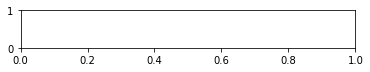

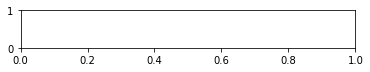

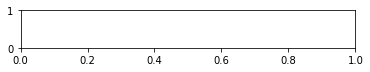

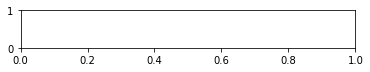

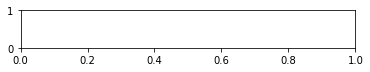

<Figure size 432x288 with 0 Axes>

In [31]:
# 선수 분석 - 포지션별

setter = plt.figure().add_subplot(5,1,1)
right = plt.figure().add_subplot(5,1,2)
center = plt.figure().add_subplot(5,1,3)
left = plt.figure().add_subplot(5,1,4)
libero = plt.figure().add_subplot(5,1,5)

setter.bar(x,)
setter.bar(x+0.2)

right.bar(x)
right.bar(x+0.2)

center.bar(x)
center.bar(x+0.2)

left.bar(x)
left.bar(x+0.2)

libero.bar(x)
libero.bar(x+0.2)

plt.figure()

In [ ]:
# 선수 분석 - 팀 별 (현대건설:초록, 도로공사:남색, GS:하늘, IBK:파랑, 흥국:핑크, 페퍼:빨강)